{'infer_column_types': 'False', 'activity': 'download'}
{'infer_column_types': 'False', 'activity': 'download', 'activityApp': 'FileDataset'}
[Info] read from /var/folders/m1/v2p5dlc135x8ctp72qfss6200000gn/T/tmpzgu3s633/https%3A/%2Fazureopendatastorage.azurefd.net/nyctlc/green/puYear=2016/puMonth=1/part-00119-tid-4753095944193949832-fee7e113-666d-4114-9fcb-bcd3046479f3-2689-1.c000.snappy.parquet
[Info] read from /var/folders/m1/v2p5dlc135x8ctp72qfss6200000gn/T/tmpzgu3s633/https%3A/%2Fazureopendatastorage.azurefd.net/nyctlc/green/puYear=2016/puMonth=2/part-00060-tid-4753095944193949832-fee7e113-666d-4114-9fcb-bcd3046479f3-2630-2.c000.snappy.parquet
[Info] read from /var/folders/m1/v2p5dlc135x8ctp72qfss6200000gn/T/tmpzgu3s633/https%3A/%2Fazureopendatastorage.azurefd.net/nyctlc/green/puYear=2016/puMonth=3/part-00196-tid-4753095944193949832-fee7e113-666d-4114-9fcb-bcd3046479f3-2766-1.c000.snappy.parquet


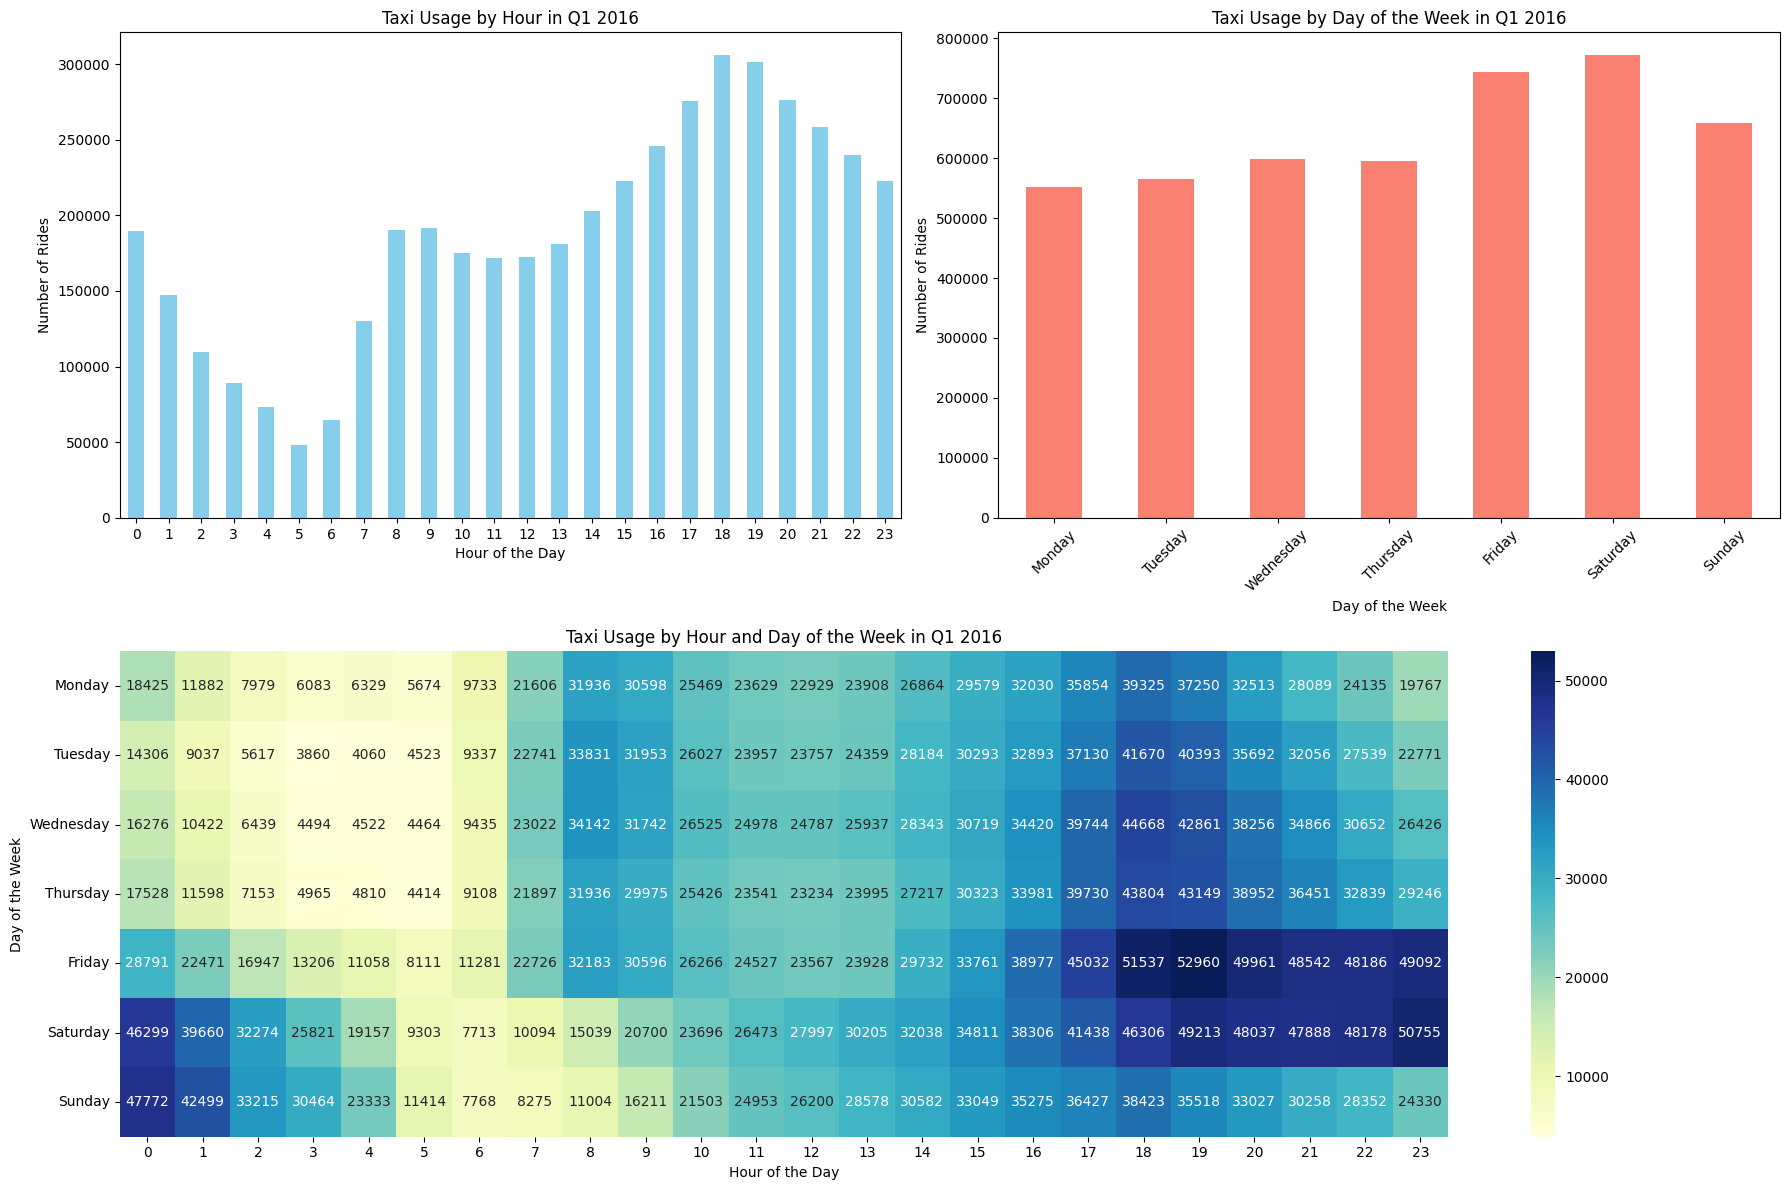

In [4]:
# Import necessary libraries
from azureml.opendatasets import NycTlcGreen
from datetime import datetime
from dateutil import parser
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging

# Set the logging level to ERROR to suppress verbose logging
logging.getLogger('azureml.opendatasets').setLevel(logging.ERROR)

# Set the date range for Q1 2016
start_date = parser.parse('2016-01-01')
end_date = parser.parse('2016-03-31')

# Fetch the dataset
nyc_tlc = NycTlcGreen(start_date=start_date, end_date=end_date)
nyc_tlc_df = nyc_tlc.to_pandas_dataframe()

# Convert pickup datetime to pandas datetime format
nyc_tlc_df['lpepPickupDatetime'] = pd.to_datetime(nyc_tlc_df['lpepPickupDatetime'])

# Extract hour and day of the week from the pickup datetime
nyc_tlc_df['hour'] = nyc_tlc_df['lpepPickupDatetime'].dt.hour
nyc_tlc_df['day_of_week'] = nyc_tlc_df['lpepPickupDatetime'].dt.day_name()

# Analyze the temporal patterns

# Group by hour
hourly_usage = nyc_tlc_df.groupby('hour').size()

# Group by day of the week
daily_usage = nyc_tlc_df.groupby('day_of_week').size()
daily_usage = daily_usage.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Group by day of the week and hour
heatmap_data = nyc_tlc_df.groupby(['day_of_week', 'hour']).size().unstack().reindex(index=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], fill_value=0)

# Plot the results
plt.figure(figsize=(18, 12))

# Plot hourly usage
plt.subplot(2, 2, 1)
hourly_usage.plot(kind='bar', color='skyblue')
plt.title('Taxi Usage by Hour in Q1 2016')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Rides')
plt.xticks(rotation=0)

# Plot daily usage
plt.subplot(2, 2, 2)
daily_usage.plot(kind='bar', color='salmon')
plt.title('Taxi Usage by Day of the Week in Q1 2016')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Rides')
plt.xticks(rotation=45)

# Plot heatmap of taxi usage by hour and day of the week
plt.subplot(2, 1, 2)
sns.heatmap(heatmap_data, cmap='YlGnBu', annot=True, fmt='d')
plt.title('Taxi Usage by Hour and Day of the Week in Q1 2016')
plt.xlabel('Hour of the Day')
plt.ylabel('Day of the Week')

plt.tight_layout()
plt.show()
